# Сопоставление данных реанализа ERA5 и CFS2 для акватории Ура-Губы

Сопоставление проводится в двух точках, которые соответствуют расположению двух метеостанций
* Ура-Губа 22018 69° 17' с.ш., 32° 48' в.д.; 27 м -- (69.283 с.ш.; 32.80 в.д.)
* Полярный 22019 69° 12' с.ш., 33° 28.823999999999998' в.д.; 13 м -- (69.20 с.ш.; 33.48 в.д.)

In [1]:
import os
import numpy as np
import pandas as pd

from meteotik.reanalysis import ERA5Processor
from meteotik.reanalysis import CFS2Processor

from meteotik.analysis import equal_mapping, print_statistics,\
make_visual_comparison, qq_comparison, make_report

import datetime

from matplotlib import pyplot as plt
from pylab import rcParams
rcParams['figure.figsize'] = 12, 4

In [2]:
files_cfs2 = ['cfs2u_wind_201701.nc', 'cfs2u_wind_201702.nc', 'cfs2u_wind_201703.nc', 'cfs2u_wind_201704.nc',
              'cfs2u_wind_201705.nc', 'cfs2u_wind_201706.nc', 'cfs2u_wind_201707.nc', 'cfs2u_wind_201708.nc',
              'cfs2u_wind_201709.nc', 'cfs2u_wind_201710.nc', 'cfs2u_wind_201711.nc', 'cfs2u_wind_201802.nc',
              'cfs2u_wind_201803.nc', 'cfs2u_wind_201805.nc', 'cfs2u_wind_201806.nc', 'cfs2u_wind_201807.nc',
              'cfs2u_wind_201808.nc', 'cfs2u_wind_201809.nc', 'cfs2u_wind_201810.nc']

files_era5 = ['wind_ura_2017-01-01.nc', 'wind_ura_2017-02-01.nc', 'wind_ura_2017-03-01.nc', 'wind_ura_2017-04-01.nc',
              'wind_ura_2017-05-01.nc', 'wind_ura_2017-06-01.nc', 'wind_ura_2017-07-01.nc', 'wind_ura_2017-08-01.nc',
              'wind_ura_2017-09-01.nc', 'wind_ura_2017-10-01.nc', 'wind_ura_2017-11-01.nc', 'wind_ura_2017-12-01.nc',
              'wind_ura_2018-03-01.nc', 'wind_ura_2018-05-01.nc', 'wind_ura_2018-06-01.nc', 'wind_ura_2018-07-01.nc',
              'wind_ura_2018-08-01.nc', 'wind_ura_2018-09-01.nc', 'wind_ura_2018-10-01.nc']

## Метеостанция Ура-Губа

In [3]:
cfs2_processor = CFS2Processor('D:/ura-guba/cfs2', files = files_cfs2,
                               u10_name = 'u10', v10_name = 'v10')
cfs2_ura = cfs2_processor.prepare_time_series(coordinates = {'lat': 69.283, 'lon': 32.80},
                                              change_time_step = False)
# Переименуем колонки
cfs2_ura = cfs2_ura.rename(columns={"U_reanalysis": "U компонента (CFS2)",
                                    "V_reanalysis": "V компонента (CFS2)", 
                                    "Velocity_reanalysis": "Скорость ветра (CFS2)"})

Processing... cfs2u_wind_201701.nc
Processing... cfs2u_wind_201702.nc
Processing... cfs2u_wind_201703.nc
Processing... cfs2u_wind_201704.nc
Processing... cfs2u_wind_201705.nc
Processing... cfs2u_wind_201706.nc
Processing... cfs2u_wind_201707.nc
Processing... cfs2u_wind_201708.nc
Processing... cfs2u_wind_201709.nc
Processing... cfs2u_wind_201710.nc
Processing... cfs2u_wind_201711.nc
Processing... cfs2u_wind_201802.nc
Processing... cfs2u_wind_201803.nc
Processing... cfs2u_wind_201805.nc
Processing... cfs2u_wind_201806.nc
Processing... cfs2u_wind_201807.nc
Processing... cfs2u_wind_201808.nc
Processing... cfs2u_wind_201809.nc
Processing... cfs2u_wind_201810.nc


In [4]:
era5_processor = ERA5Processor('D:/ura-guba/era5', files = files_era5)
era5_ura = era5_processor.prepare_time_series(coordinates = {'lat': 69.283, 'lon': 32.80},
                                              change_time_step = False)
# Переименуем колонки
era5_ura = era5_ura.rename(columns={"U_reanalysis": "U компонента (ERA5)",
                                    "V_reanalysis": "V компонента (ERA5)", 
                                    "Velocity_reanalysis": "Скорость ветра (ERA5)"})

Processing... wind_ura_2017-01-01.nc
Processing... wind_ura_2017-02-01.nc
Processing... wind_ura_2017-03-01.nc
Processing... wind_ura_2017-04-01.nc
Processing... wind_ura_2017-05-01.nc
Processing... wind_ura_2017-06-01.nc
Processing... wind_ura_2017-07-01.nc
Processing... wind_ura_2017-08-01.nc
Processing... wind_ura_2017-09-01.nc
Processing... wind_ura_2017-10-01.nc
Processing... wind_ura_2017-11-01.nc
Processing... wind_ura_2017-12-01.nc
Processing... wind_ura_2018-03-01.nc
Processing... wind_ura_2018-05-01.nc
Processing... wind_ura_2018-06-01.nc
Processing... wind_ura_2018-07-01.nc
Processing... wind_ura_2018-08-01.nc
Processing... wind_ura_2018-09-01.nc
Processing... wind_ura_2018-10-01.nc


### Сравнение

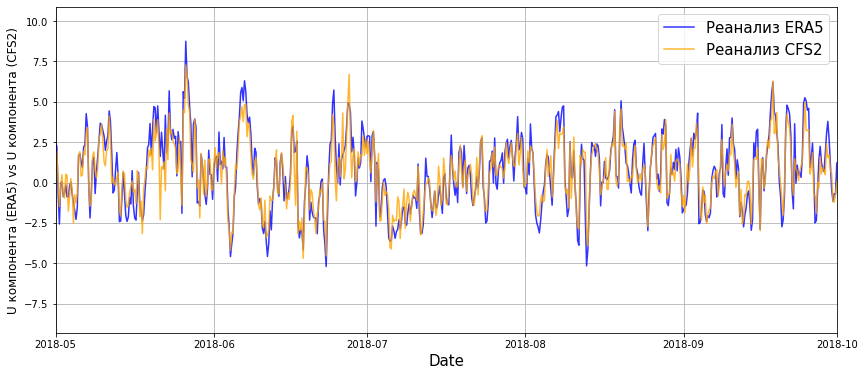

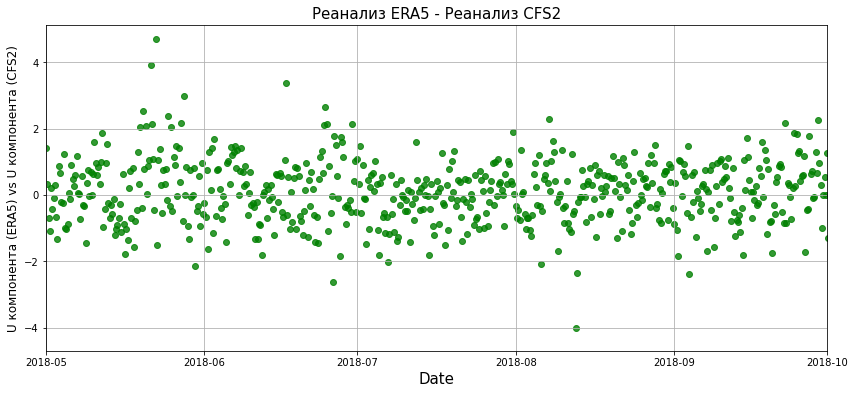

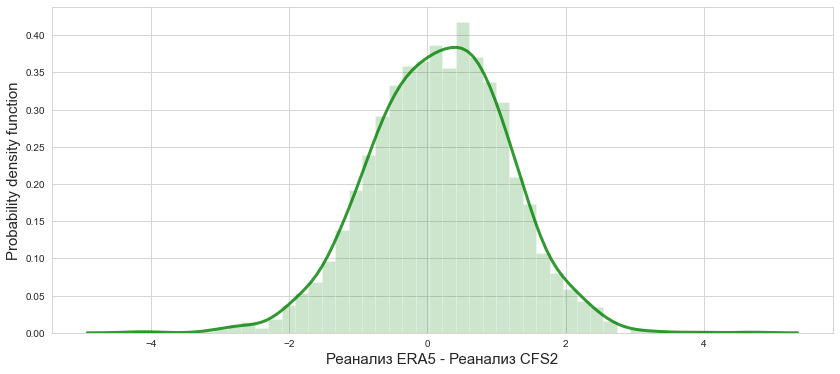

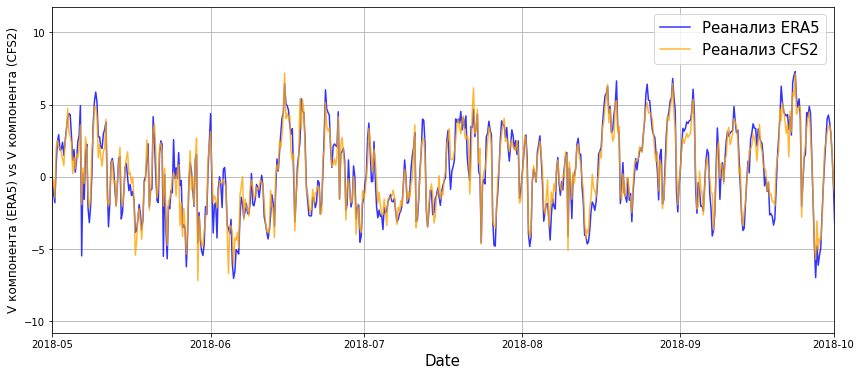

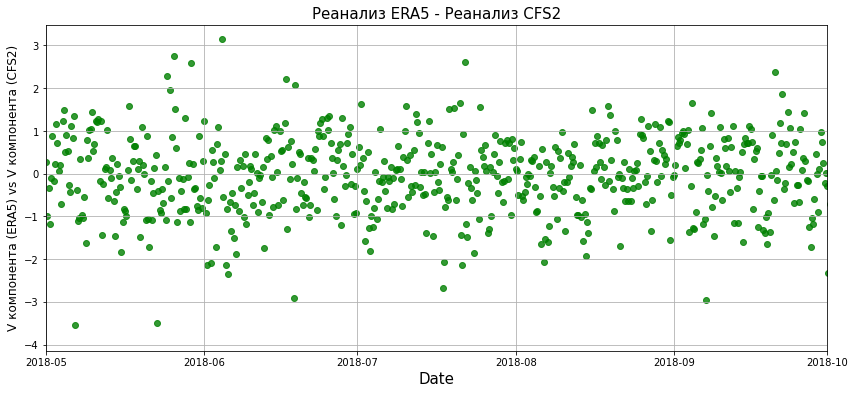

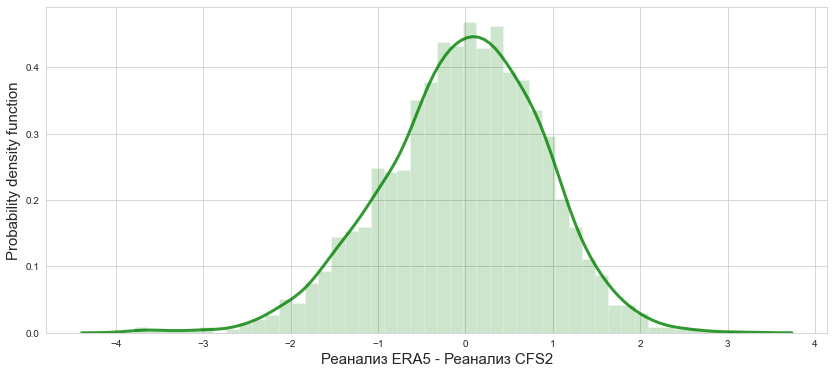

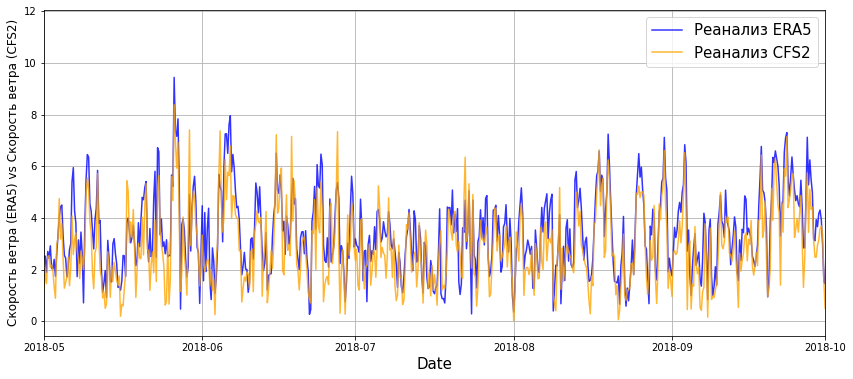

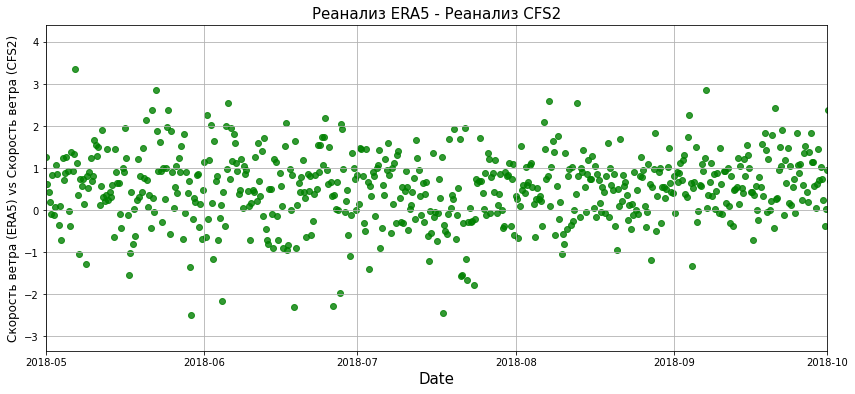

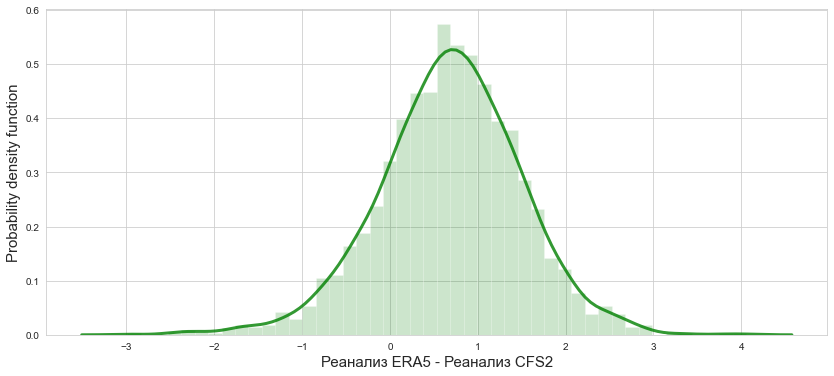

In [6]:
rcParams['figure.figsize'] = 14, 6

# Приводим датафреймы к единому виду 
cfs2_df, era5_df = equal_mapping(dataframe_left=cfs2_ura, 
                                 dataframe_right=era5_ura,
                                 merge_column='Date')

make_visual_comparison(dataframe_left = era5_df,
                       dataframe_right = cfs2_df,
                       columns_for_compare = {'U компонента (ERA5)':'U компонента (CFS2)', 
                                              'V компонента (ERA5)':'V компонента (CFS2)',
                                              'Скорость ветра (ERA5)':'Скорость ветра (CFS2)'},
                       dataframe_labels = ['Реанализ ERA5', 'Реанализ CFS2'],
                       x_min = "2018-5-1", x_max = "2018-10-1")

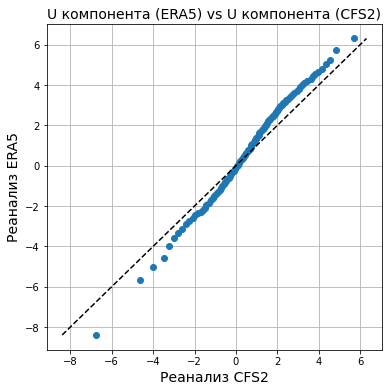

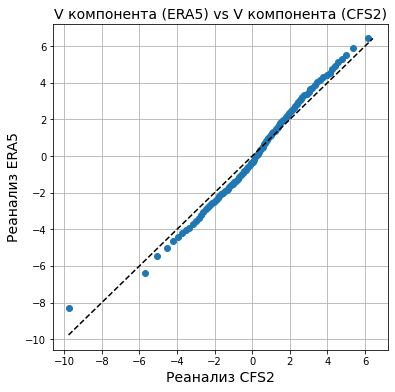

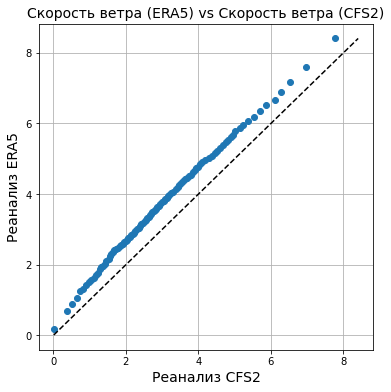

In [7]:
rcParams['figure.figsize'] = 6, 6

qq_comparison(dataframe_left = era5_df,
              dataframe_right = cfs2_df,
              columns_for_compare = {'U компонента (ERA5)':'U компонента (CFS2)', 
                                     'V компонента (ERA5)':'V компонента (CFS2)',
                                     'Скорость ветра (ERA5)':'Скорость ветра (CFS2)'},
              dataframe_labels = ['Реанализ ERA5', 'Реанализ CFS2'])

In [8]:
df = make_report(dataframe_left = era5_df,
                 dataframe_right = cfs2_df,
                 columns_for_compare = {'U компонента (ERA5)':'U компонента (CFS2)', 
                                        'V компонента (ERA5)':'V компонента (CFS2)',
                                        'Скорость ветра (ERA5)':'Скорость ветра (CFS2)'},
                 check_peaks = True)

df

,Variables,Bias,MAE,Correlation
0,U компонента (ERA5) vs U компонента (CFS2),-0.175120,0.804140,0.938237
1,(Peak) U компонента (ERA5) vs U компонента (CFS2),-0.947054,1.055825,0.772706
2,V компонента (ERA5) vs V компонента (CFS2),0.025403,0.714202,0.955742
3,(Peak) V компонента (ERA5) vs V компонента (CFS2),-0.602307,0.751095,0.862332
4,Скорость ветра (ERA5) vs Скорость ветра (CFS2),-0.685277,0.872529,0.880107
5,(Peak) Скорость ветра (ERA5) vs Скорость ветра...,-0.916341,1.045553,0.773997


## Метеостанция Полярный

In [9]:
cfs2_pol = cfs2_processor.prepare_time_series(coordinates = {'lat': 69.20, 'lon': 33.48},
                                              change_time_step = False)
# Переименуем колонки
cfs2_pol = cfs2_pol.rename(columns={"U_reanalysis": "U компонента (CFS2)",
                                    "V_reanalysis": "V компонента (CFS2)", 
                                    "Velocity_reanalysis": "Скорость ветра (CFS2)"})

Processing... cfs2u_wind_201701.nc
Processing... cfs2u_wind_201702.nc
Processing... cfs2u_wind_201703.nc
Processing... cfs2u_wind_201704.nc
Processing... cfs2u_wind_201705.nc
Processing... cfs2u_wind_201706.nc
Processing... cfs2u_wind_201707.nc
Processing... cfs2u_wind_201708.nc
Processing... cfs2u_wind_201709.nc
Processing... cfs2u_wind_201710.nc
Processing... cfs2u_wind_201711.nc
Processing... cfs2u_wind_201802.nc
Processing... cfs2u_wind_201803.nc
Processing... cfs2u_wind_201805.nc
Processing... cfs2u_wind_201806.nc
Processing... cfs2u_wind_201807.nc
Processing... cfs2u_wind_201808.nc
Processing... cfs2u_wind_201809.nc
Processing... cfs2u_wind_201810.nc


In [10]:
era5_pol = era5_processor.prepare_time_series(coordinates = {'lat': 69.20, 'lon': 33.48},
                                              change_time_step = False)
# Переименуем колонки
era5_pol = era5_pol.rename(columns={"U_reanalysis": "U компонента (ERA5)",
                                    "V_reanalysis": "V компонента (ERA5)", 
                                    "Velocity_reanalysis": "Скорость ветра (ERA5)"})

Processing... wind_ura_2017-01-01.nc
Processing... wind_ura_2017-02-01.nc
Processing... wind_ura_2017-03-01.nc
Processing... wind_ura_2017-04-01.nc
Processing... wind_ura_2017-05-01.nc
Processing... wind_ura_2017-06-01.nc
Processing... wind_ura_2017-07-01.nc
Processing... wind_ura_2017-08-01.nc
Processing... wind_ura_2017-09-01.nc
Processing... wind_ura_2017-10-01.nc
Processing... wind_ura_2017-11-01.nc
Processing... wind_ura_2017-12-01.nc
Processing... wind_ura_2018-03-01.nc
Processing... wind_ura_2018-05-01.nc
Processing... wind_ura_2018-06-01.nc
Processing... wind_ura_2018-07-01.nc
Processing... wind_ura_2018-08-01.nc
Processing... wind_ura_2018-09-01.nc
Processing... wind_ura_2018-10-01.nc


### Сравнение

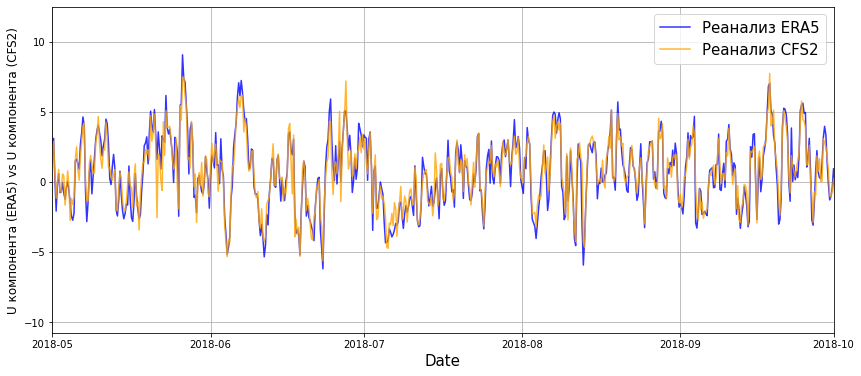

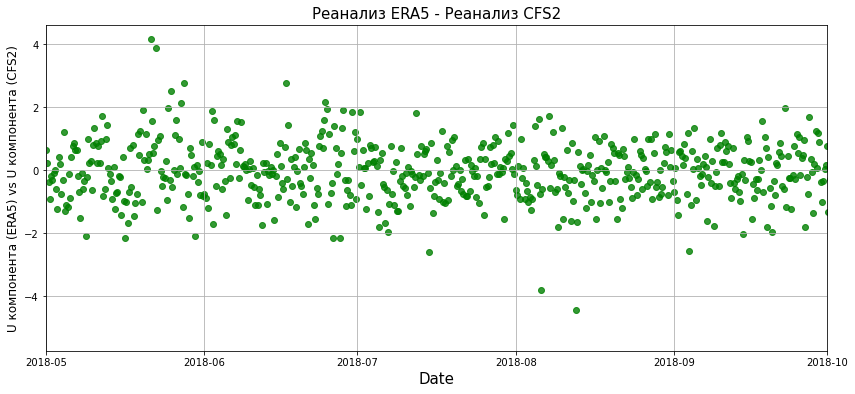

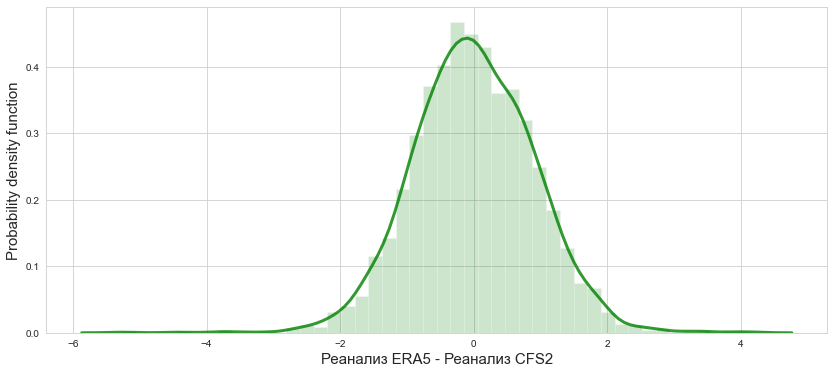

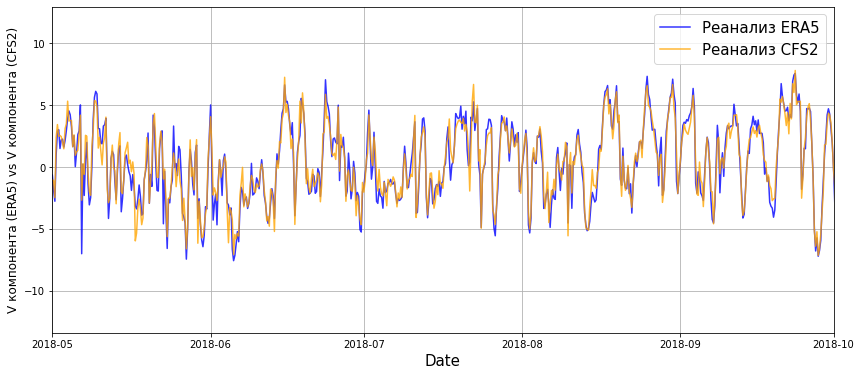

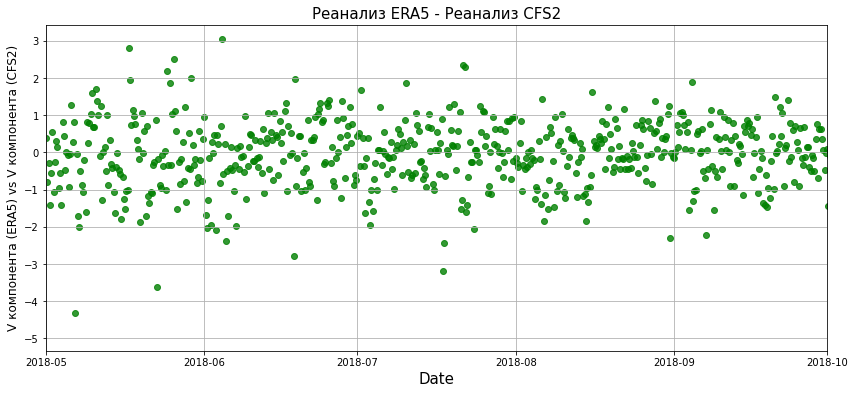

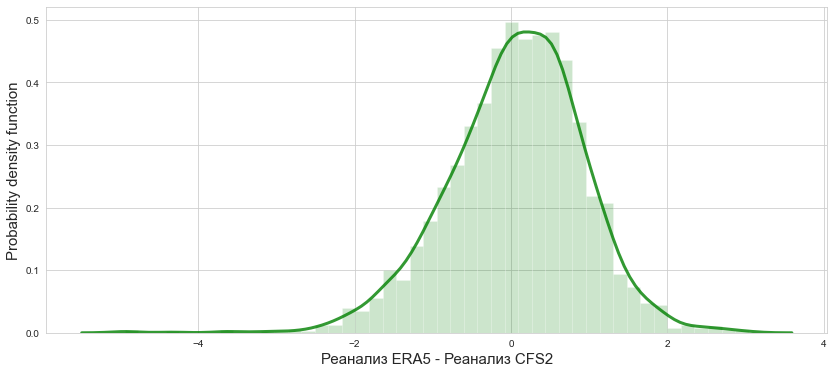

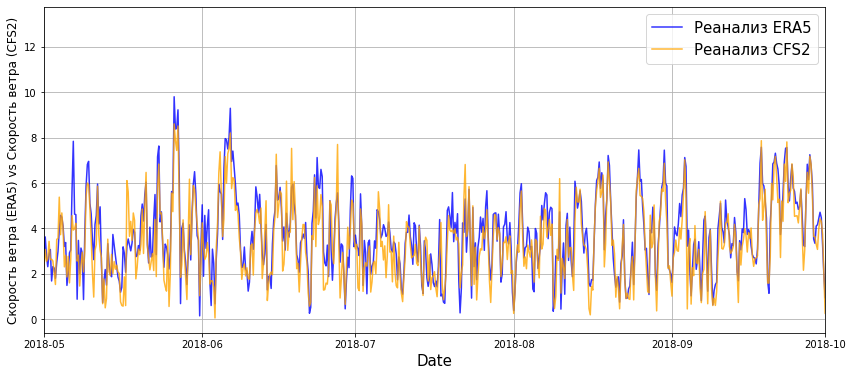

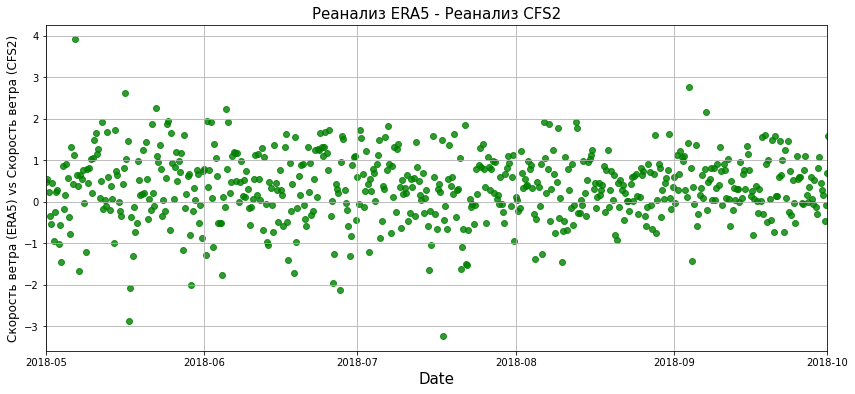

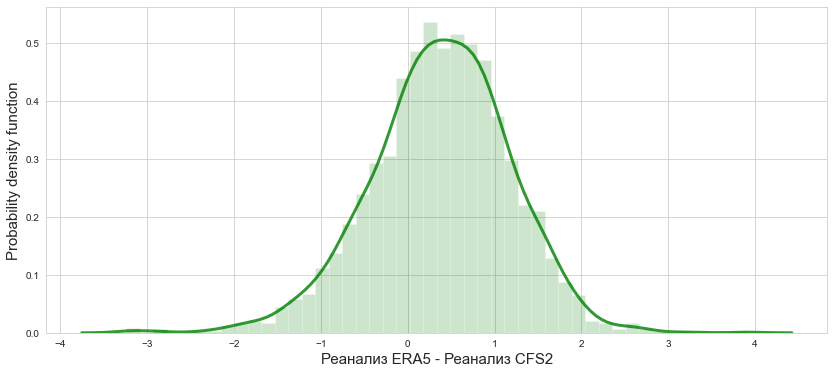

In [11]:
rcParams['figure.figsize'] = 14, 6

# Приводим датафреймы к единому виду 
cfs2_df, era5_df = equal_mapping(dataframe_left=cfs2_pol, 
                                 dataframe_right=era5_pol,
                                 merge_column='Date')

make_visual_comparison(dataframe_left = era5_df,
                       dataframe_right = cfs2_df,
                       columns_for_compare = {'U компонента (ERA5)':'U компонента (CFS2)', 
                                              'V компонента (ERA5)':'V компонента (CFS2)',
                                              'Скорость ветра (ERA5)':'Скорость ветра (CFS2)'},
                       dataframe_labels = ['Реанализ ERA5', 'Реанализ CFS2'],
                       x_min = "2018-5-1", x_max = "2018-10-1")

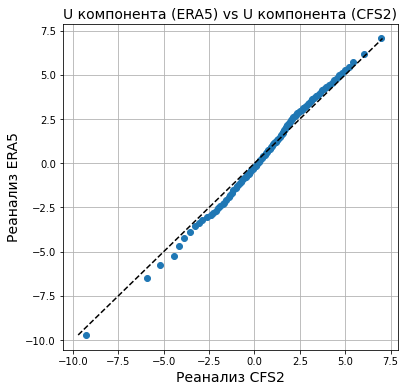

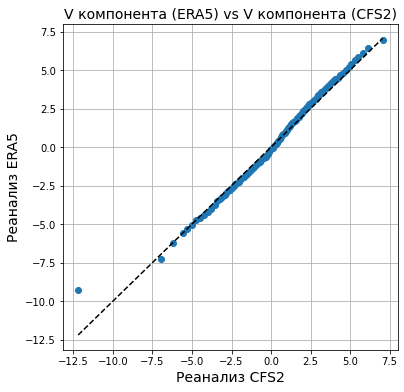

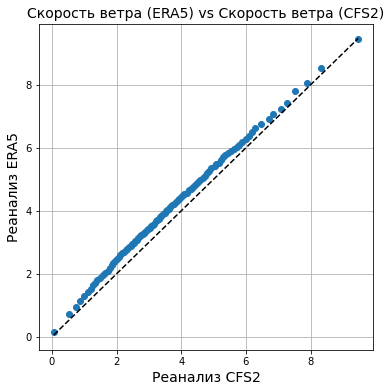

In [12]:
rcParams['figure.figsize'] = 6, 6

qq_comparison(dataframe_left = era5_df,
              dataframe_right = cfs2_df,
              columns_for_compare = {'U компонента (ERA5)':'U компонента (CFS2)', 
                                     'V компонента (ERA5)':'V компонента (CFS2)',
                                     'Скорость ветра (ERA5)':'Скорость ветра (CFS2)'},
              dataframe_labels = ['Реанализ ERA5', 'Реанализ CFS2'])

In [13]:
df = make_report(dataframe_left = era5_df,
                 dataframe_right = cfs2_df,
                 columns_for_compare = {'U компонента (ERA5)':'U компонента (CFS2)', 
                                        'V компонента (ERA5)':'V компонента (CFS2)',
                                        'Скорость ветра (ERA5)':'Скорость ветра (CFS2)'},
                 check_peaks = True)

df

,Variables,Bias,MAE,Correlation
0,U компонента (ERA5) vs U компонента (CFS2),0.001728,0.710306,0.954770
1,(Peak) U компонента (ERA5) vs U компонента (CFS2),-0.499553,0.783670,0.816292
2,V компонента (ERA5) vs V компонента (CFS2),-0.058060,0.677314,0.964895
3,(Peak) V компонента (ERA5) vs V компонента (CFS2),-0.403428,0.660150,0.881315
4,Скорость ветра (ERA5) vs Скорость ветра (CFS2),-0.379264,0.709795,0.912324
5,(Peak) Скорость ветра (ERA5) vs Скорость ветра...,-0.447689,0.763793,0.832128
